# Example of how to use eigensimpy signal class

First we need to import Eigensimpy package

In [1]:
# add eigensym py to the
import sys
import os

current_dir = os.getcwd()
project_dir = os.path.dirname(current_dir)  # This moves up one level to the project folder

sys.path.append(project_dir)


Then we can use the pulse factory to create a signal

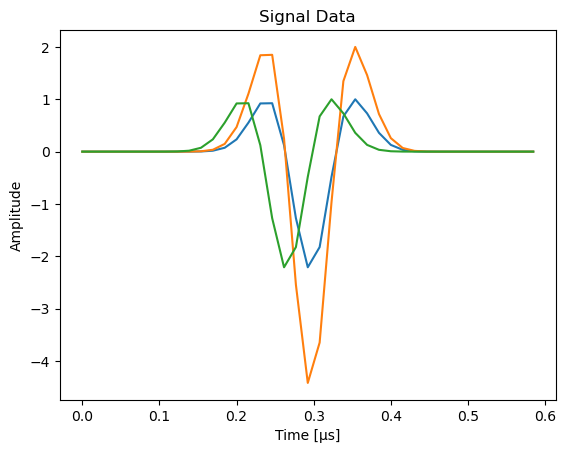

In [35]:
from eigensimpy.dsp.SignalFactories import PulseFactory
from eigensimpy.dsp.Signals import Signal, Dimension, DimensionArray, Quantity


import numpy as np

pf = PulseFactory();
signal = pf.calc_pulse('simple1') 

ax, lines = signal.plot()
signal2 = Signal(data=signal.data * 2, dims=signal.dims);

ax, lines = signal2.plot(ax=ax)
# create a shifted data vector by 2 samples pad rest with zeros
data_shifted = np.zeros( (len(signal.data),1) )
data_shifted[0:len(signal.data)-2, 0] = signal.data[2:len(signal.data), 0]


signal3 = Signal(data=data_shifted, dims=signal.dims);
ax, lines = signal3.plot(ax=ax)




Delta =  0.015384615384615408
Delta *2 =  0.030769230769230816
Max Auto Correlation =  0.03076923076923077


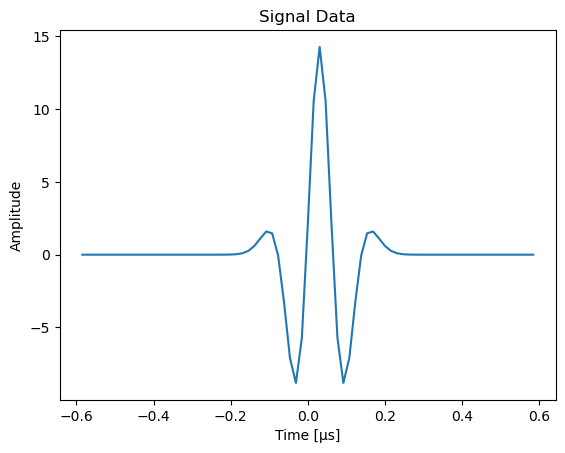

In [38]:
# compute the autocorrelation of the signal3 and signal
ac_data = np.correlate(signal.data[:,0], signal3.data[:,0], mode='full')

# need to shift the time vector 
dim0 = signal.dims[0] 
dim_vector = dim0.dim_vector(signal.shape[0])
qu = Quantity(name='Time', si_unit='μs')
dim = DimensionArray([ Dimension( quantity=qu, delta=dim0.delta, offset=dim0.offset-dim_vector[-1]), Dimension()] )

signal4 = Signal(data=ac_data, dims=dim);

ax2, lines2 = signal4.plot()

print( "Delta = ", signal4.dims[0].delta )
print( "Delta *2 = ", signal4.dims[0].delta *2 )

max_index = np.argmax(signal4.data)
#
dim_vector = signal4.dims[0].dim_vector(signal4.shape[0])
max_ac = dim_vector[max_index]

print( "Max Auto Correlation = ", max_ac )


# Test
